In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x2 = np.array([np.random.uniform(0,20, 2) for i in range(150)])

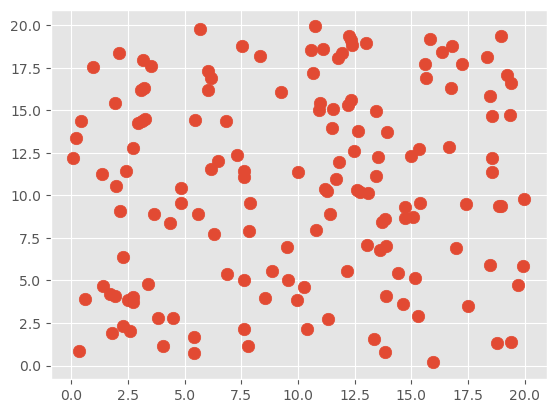

In [3]:
from matplotlib import style
style.use('ggplot')
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1,10],
              [9,2],
              [4,2],
              [4.5,5],
              [3,8],
              [7,4],
              [1, 0.6],
              [9,11]])

plt.scatter(x2[:,0], x2[:,1], s=80)
plt.show()

In [4]:
class K_means:
    def __init__(self, num_clusters, max_iters):
        self.num_clusters = num_clusters
        self.max_iters = max_iters
    
    def min_max(self,data):
        """First element is min second is max - used within random_centroids """
        v = data                # again self.vector in class approach          could specific wanting min or max for better readability code
        b = list(zip(np.amin(v,axis=0),np.amax(v,axis=0)))
        np.array(b)
        return np.array(b)   #  outputs min and max for each element of vector/matrix
    
    def random_centroid(self,data):        
        """Initializes centroid position"""
        features_len = data.shape[-1]                          # for object approach this would be self.input_vector etc
        ranges = self.min_max(data)                                                        # random centroids would use min max for this part - testing purely
        m = [np.random.uniform(item[0],item[1])for item in ranges]    # input min max and generate random vals -   change this line for multi dimensional data
        rand_v = [np.random.uniform(item[0],item[1])for item in ranges]
        return m                #has to be done after normalizing for this instance

    def euclidean(self,centroid,point):
        """Pass in centroid and point. Where 1 more element, calculates euclidean by going up to that point - 
        this accounts for labels at end of each vector"""
        def calc_dist(centroid,point):
            sub = np.subtract(centroid,point)      # subtract vector
            res = np.square(sub)                   # squaring subtracted values
            return np.sqrt(np.sum(res))           # square root
        if len(centroid)==len(point):
            out = calc_dist(centroid,point)        
        else:
            point = point[:-1]
            out = calc_dist(centroid,point)     
        return out

    def classify_labels(self,data,centroids_list):
        """Pass in data and centroids_list - this gets updated"""
        labels = []     # can do as list comprehension after
        for vec in data:
            comp_list = []
            for point in self.centroids_list:
                comp_list.append(self.euclidean(point,vec))       # make list of all a points distances to all centroids and return argmin
            point_class = np.argmin(comp_list)
            labels.append(point_class)
        return labels         
    
    def update_centroids(self,data,labels):
        """Updates Centroids - pass in labels,centroids and data"""
        new_points = []
        for i in range(self.num_clusters):
            positions = [pos for pos, el in enumerate(labels) if el==i]        # call labels in class for test call it m
            pos_mean = np.take(data,positions,axis=0).mean(axis=0)         #calculates mean for centroid update                
            new_points.append(pos_mean)                                      # could list comprehend - easier readability like this
        return new_points
    
    def fit(self,data):
        """Fit data to model - pass in data"""
        self.centroids_list = [self.random_centroid(data) for i in range(self.num_clusters)]     # initiliaze centroids
        
        for iter in range(self.max_iters):        
            labels = self.classify_labels(data,self.centroids_list)                                                 
            new_centroids = self.update_centroids(data,labels)                              # assign updated centroids to new centroids            
            print(self.centroids_list)

            self.centroids_list = new_centroids                                  #update centroids to calculated centroids
        

[[9.75467034270689, 14.697850178678305], [16.871988389368852, 12.965491816339703], [2.939925254444176, 3.9350628934230896], [16.0268612019599, 5.987073717006339]]
[array([ 7.93743249, 15.23347133]), array([16.72679538, 14.10201296]), array([3.9280563 , 5.28731384]), array([14.26414179,  5.31379612])]
[array([ 7.51156313, 15.45561602]), array([16.60590061, 14.61944568]), array([3.95350324, 5.4299569 ]), array([14.06521717,  5.8450768 ])]
[array([ 6.97458316, 15.91737344]), array([16.15935369, 14.74970061]), array([4.05968508, 5.54185967]), array([14.01735154,  6.17730187])]
[array([ 6.27635254, 15.72720617]), array([15.4082074 , 15.41771087]), array([4.05968508, 5.54185967]), array([14.25036521,  6.3308453 ])]
[array([ 5.20440963, 15.28261092]), array([14.7700925 , 15.77664622]), array([4.21960988, 5.18371881]), array([14.38358526,  6.41158352])]
[array([ 4.48348656, 14.57240051]), array([14.47617274, 15.97521781]), array([4.35972374, 4.66241115]), array([14.38358526,  6.41158352])]
[ar

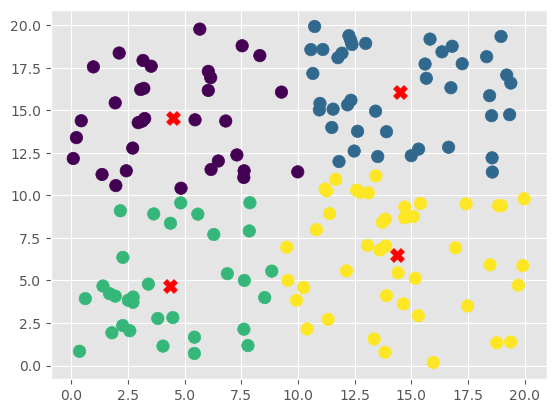

In [5]:
model = K_means(4,30)
model.fit(x2)
labels = model.classify_labels(x2,model.centroids_list)

for centroid in model.centroids_list:
    plt.scatter(centroid[0],centroid[1],c="red" ,marker="X",s=100)    
plt.scatter(x2[:,0], x2[:,1], s=80,c=labels)
plt.show()

In [6]:
type(labels)

list

In [7]:
print(labels)

[2, 0, 2, 0, 3, 3, 0, 1, 3, 2, 1, 1, 2, 2, 2, 2, 3, 1, 3, 1, 0, 2, 2, 1, 2, 1, 3, 1, 2, 0, 1, 2, 3, 2, 0, 1, 0, 0, 3, 2, 1, 0, 3, 3, 3, 0, 1, 0, 3, 3, 1, 0, 3, 2, 3, 2, 0, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 3, 0, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 0, 0, 2, 3, 1, 1, 0, 1, 3, 3, 0, 1, 2, 1, 0, 3, 0, 1, 0, 1, 2, 1, 1, 1, 3, 2, 1]


In [8]:
# got to points classificaton for different classes - figure a way to do this for multple classes - now need to work out averaging these points and initiliazing new centrod

In [9]:
b = np.array([[3,4,5,7],[5,1,2,6],[5,5,2,1]])
v = [np.random.uniform(1,3) for i in range(b.shape[-1])]
print(v)

[2.0228855867100295, 1.3231462704047452, 1.177895329973561, 2.943353551157074]


In [10]:
for el in b:
    print(el)

[3 4 5 7]
[5 1 2 6]
[5 5 2 1]


In [11]:
b.shape[-1]

4